In [1]:
import numpy
from PIL import Image
from PIL import ImageEnhance
import io
import requests
import json
import time
import random

In [71]:
#Init the needed functions for images
def create_and_save_image(width = 64, height = 64 , name = 'random.png'):
    imarray = numpy.random.rand(width,height,3) * 255
    im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
    im.save(name)

def create_and_save_n_images(width=64 , height = 64, num = 100):
    for n in range(num):
        create_image(width, height, ('random'+str(n+1)+'.png'))
        
def create_bytearray(width=64,height=64):
    imarray = numpy.random.rand(width,height,3)*255
    casted = imarray.astype('uint8')
    return casted

def create_bytearray_with_color_prop(width = 64, height = 64, prop_red = 33, prop_green = 33, prop_blue = 33):
    #Initalize array with zeros
    imarray = numpy.random.rand(width * height, 3) * 0
    red_pixel = prop_red/100*width*height
    green_pixel = prop_green/100*width*height
    blue_pixel = prop_blue/100*width*height
    for x in range(height):
        for y in range(width):
            if(red_pixel > 0):
                imarray[x*width+y] = [random.random() * 255,0,0]
                red_pixel-= 1
            elif(green_pixel > 0):
                imarray[x*width+y] = [0,random.random() * 255,0]
                green_pixel-= 1
            elif(blue_pixel > 0):
                imarray[x*width+y] = [0,0,random.random() * 255]
                blue_pixel-= 1
            else:
                #Wrong proportion --> white pixel
                imarray[x*width+y] = [255,255,255]
    
    numpy.random.shuffle(imarray)
    immatrix = numpy.random.rand(height, width, 3) * 0
    for x in range(height):
        for y in range(width):
            immatrix[x,y] = imarray[x*width+y]
    casted = immatrix.astype('uint8')
    return casted

def change_brigthness_of_img(image, brightnessFactor=1.0):
    changedImage = ImageEnhance.Brightness(image).enhance(brightnessFactor)
    return changedImage

def change_contrast_of_img(image, contrastFactor=1.0):
    changedImage = ImageEnhance.Contrast(image).enhance(contrastFactor)
    return changedImage

def create_img_from_bytearray(bytearr, colorscheme='RGBA'):
    im=Image.fromarray(bytearr).convert(colorscheme)
    return im

def img_to_bytearray(Image):
    imgByteArr = io.BytesIO()
    Image.save(imgByteArr, format='PNG')
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr

2.601776374786005


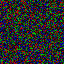

In [93]:
#check
img = create_img_from_bytearray(create_bytearray())
img
print(random.random() * 255)
#img_to_bytearray(img)
img_prop = create_img_from_bytearray(create_bytearray_with_color_prop(64,64,33,34,33))
img_prop = change_contrast_of_img(img_prop, 0.75)
img_prop

In [94]:
#load trasi infos
url = 'https://phinau.de/trasi'
access_key = 'ehiefoveingereim3ooD2vo8reeb9ooz'
credentials = {'key': access_key}

In [95]:
def send_img_bytearray(nipples):
    file_to_upload = {'image': nipples}
    post_request = requests.post(url, files=file_to_upload, data=credentials)
    return post_request

In [96]:
#check
img = create_img_from_bytearray(create_bytearray_with_color_prop(64,64,33,34,33))
imgNipples = img_to_bytearray(img)
send_img_bytearray(imgNipples).status_code

200

In [97]:
def get_best_score(ResponseText):
    scores = json.loads(ResponseText)
    return scores[0].get('confidence')

def save_results(bestScore,imgBytes):
    #to be done, only mockup
    print(str(bestScore))

def full_loop():
    img_bytes = img_to_bytearray(create_img_from_bytearray(create_bytearray_with_color_prop(64,64,33,34,33)))
    response = send_img_bytearray(img_bytes)
    if(response.status_code==200):
        save_results(get_best_score(response.text),img_bytes)
    else:
        #throw errors? Show me something?
        print('upsie, got a ', response.status_code)

In [98]:
#check
full_loop()

0.06320946


In [99]:
def execute_timed_full_loops(MaxLoops,Intervall):
    i=0
    while(i < MaxLoops):
        full_loop()
        time.sleep(Intervall)
        i+=1;

In [ ]:
execute_timed_full_loops(100, 1.2)